# Unsupervised Learning
## K-means Clustering - Numpy Implementation

Author: Bingchen Wang

Last Updated: 18 Sep, 2022

---
<nav>
    <a href="../../Machine%20Learning.ipynb">Machine Learning</a> |
    <a href="../Unsupervised Learning.ipynb">Unsupervised Learning</a> |
</nav>

---

## Contents

- [Import packages](#IP)
- [Define functions](#DF)
    - initialize centroids
    - find closest centroids
    - update centroids
    - train learner
    - compute loss
- [Put the algorithm into practice](#PTAIP)


<a name = "IP"></a>
### Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<a name = "DF"></a>
### Define functions

In [32]:
#initialize centroids
def initialize_centroids(X, K):
    """
    initialize centroids by randomly picking K examples from the dataset
    :param X: dataset ndarray (m,n)
    :param K: number of centroids
    :return: initial centroids ndarry (K,n)
    """
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

#find closest centroids
def find_closest_centroids(X, centroids):
    """
    find the closest centroid for each example given centroids
    :param X: dataset ndarray (m,n)
    :param centroids: cluster centroids ndarray(K,n)
    :return: indices of closest centroids ndarray (m,1)
    """
    X_reshaped = X[:,np.newaxis,:]
    dist = np.linalg.norm(X_reshaped - centroids, ord = 2, axis = 2)
    idx_centroids = np.argmin(dist, axis = 1)
    return idx_centroids

#update centroids
def update_centroids(X, idx, K):
    """
    Update the cluster centroids given X and latent labels idx
    :param X: dataset ndarray (m,n)
    :param idx: latent labels ndarray (m,1)
    :param K: number of centroids
    :return: updated cluster centroids ndarray (K,n)
    """
    m,n = X.shape
    centroids = np.zeros((K,n))
    for k in range(K):
        centroids[k] = np.mean(X[idx == k], axis = 0)
    return centroids

def compute_cost(X, idx, centroids):
    """
    Compute the cost function given X, idx and centroids
    :param X: dataset ndarray (m,n)
    :param idx: latent labels ndarray (m,1)
    :param centroids: cluster centroids ndarray (K,n)
    :return: cost
    """
    m,n = X.shape
    centroids_expanded = centroids[idx]
    cost = 1/m * np.linalg.norm(X-centroids_expanded, ord = 2)**2
    return cost

#train learner
def training(X, K, num_iter = 100, verbose = True):
    centroids = initialize_centroids(X, K)
    training_history = []
    for i in range(num_iter):
        idx = find_closest_centroids(X, centroids)
        centroids = update_centroids(X, idx, K)
        cost = compute_cost(X, idx, centroids)
        training_history.append(cost)
        
        if verbose:
            print(f"\rK-means Clustering Iteration: {i+1} | Cost: {cost}", end = "")
            if (i+1) % (num_iter//20) == 0:
                print(f"\rK-means Clustering Iteration: {i+1} | Cost: {cost}")
            
    return centroids, idx, training_history, cost

<a name = "PTAIP"></a>
### Put the alogrithm into practice 

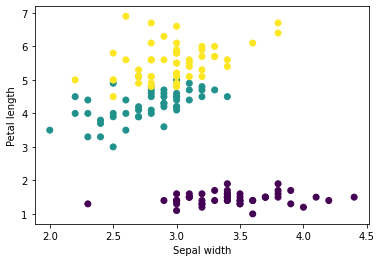

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target

plt.scatter(X[:, 1], X[:, 2], c =y)
plt.xlabel("Sepal width")
plt.ylabel("Petal length")
plt.show()

Costs of the 10 epochs: [0.29895323 0.29895323 0.64860759 0.29751579 0.29895323 0.29751579
 0.29895323 0.29751579 0.64845698 0.64845698]
----------------------------------------------------------------------------------------------------
Best training epoch: 3
Best training cost: [0.29751579]


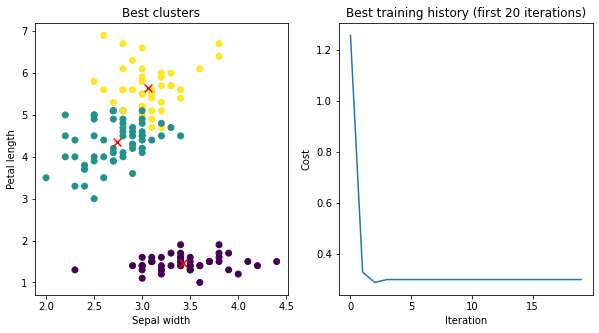

In [57]:
num_epochs = 10
m,n = X.shape
K = 3

sets_centroids = np.zeros((num_epochs, K, n))
sets_idx = np.zeros((num_epochs, m, 1))
sets_training_history = []
sets_final_cost = np.zeros((num_epochs,1))

for i in range(num_epochs):
    centroids, idx, history, cost = training(X, K, verbose = False)
    sets_centroids[i] = centroids
    sets_idx[i] = idx.reshape((-1,1))
    sets_training_history.append(history)
    sets_final_cost[i] = cost
    
best_epoch = np.squeeze(np.argmin(sets_final_cost, axis = 0))
best_cost = sets_final_cost[best_epoch]
best_training_history = sets_training_history[best_epoch]
best_idx = sets_idx[best_epoch]
best_centroids = sets_centroids[best_epoch]
print(f'Costs of the {num_epochs} epochs: {sets_final_cost.reshape((-1))}')
print(f'-'*100)
print(f'Best training epoch: {best_epoch}')
print(f'Best training cost: {best_cost}')

fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].scatter(X[:, 1], X[:, 2], c =best_idx)
axes[0].scatter(best_centroids[:, 1],best_centroids[:, 2], c='r', marker = "x", s = 60)
axes[0].set_xlabel("Sepal width")
axes[0].set_ylabel("Petal length")
axes[0].set_title("Best clusters")

axes[1].plot(range(len(best_training_history[:20])), training_history[:20])
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Cost")
axes[1].set_title("Best training history (first 20 iterations)")

plt.show()